The data we collected was trimmed (explained below). Access to the data can be found at https://github.com/Tristin-Young/Physics-Lab-2-Data .
After importing, the notebook should run perfectly.

Roles / Work Breakdown Structure:

Tristin Young*(Leader/Quality Manager)*: 


*   Create a histogram using both of the data sets
*   Export a set of magnetometer readings from PhyPhox to a spreadsheet


*   Generate data using the mobile app outside








James Eyler *(Spokesperson/Project Manager)*: 


*   Draft WBS and select group roles

*   Compare reading to Bz GSM measurements
*   Calculate the ‘t value from the two data points to determine whether the two data sets are similar









**Plan Breakdown:**

In order to run our calculations, we had a **compass to point us north** with our phone and then, in order to maintain the same postition for both data sets we used a **man hole cover** in the middle of our apartment parking lot to keep the same position, styaying at least 5 meters from0 0buildings a0nd 0vehicles at all times.

In [ ]:
# import modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# read in the two sets of data
# if data need to be cropped, do that in a spreadsheet first
# give the dataframes different names when they get read in
earlyData = pd.read_csv('Lab2Data1.csv', skiprows=0)
laterData = pd.read_csv('Lab2Data2.csv', skiprows=0)

We omitted all readings before time (s) = 3.22 and time (s) = 3.5 for earlyData and laterData, respectively. This is to remove the calibration readings recieved when starting the test. At the beginning of every test, we waived our hands in a circular motion before stopping in the same testing location each time. This gave us a clearer output of the true reeading, for more accurate results.

Let us now look at the shape of the data, as well as the first few rows.

In [ ]:
earlyData.shape

(339, 5)

In [ ]:
laterData.shape

(578, 5)

In [ ]:
earlyData.head(3)

,Time (s),Magnetic Field x (µT),Magnetic Field y (µT),Magnetic Field z (µT),Absolute field (µT)
0,3.22,-1.04,21.6,-36.2,42.1
1,3.23,-1.28,21.7,-36.0,42.1
2,3.24,-1.24,21.7,-36.3,42.3


In our first data collection our average directional vector is:

<-7.75E-01, 2.13E+01, -3.62E+01>

The average of our magnitude values was: 4.20E+01

At this same time the Space Weather Prediction Center had their directional vector to be:

<-7,-1,-1>

Their magnitude value was: 7.14

In comparison to our data our directional vector is different from the vector from the SWPC in terms of our y and z values but we are very similar in terms of our x value.

*We cropped our data to only show the flatline because that was when the phone was still and able to record the data accurately*

In [ ]:
laterData.head(3)

,Time (s),Magnetic Field x (µT),Magnetic Field y (µT),Magnetic Field z (µT),Absolute field (µT)
0,3.50,4.40,16.4,-39.9,43.3
1,3.51,4.28,16.3,-39.5,42.9
2,3.52,4.26,16.3,-39.6,43.1


In our second data collection our average directional vector is:

<5.02E+00, 1.89 E+01, -3.62E+01>

The average of our magnitude values was: 4.30E+01

At this same time the Space Weather Prediction Center had their directional vector to be:

<-4,-5,-8>

Their magnitude value was: 10.25

In comparison, these two data sets were completely different and did not have similar values in **x, y or z**.

*We cropped our data to only show the flatline because that was when the phone was still and able to record the data accurately.*

Below is a histogram of both datasets on the same graph. Again, we are visualizing the Absolute field frequencies which occured most during our test.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


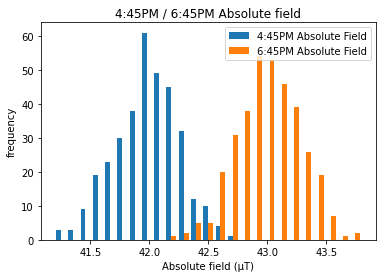

In [ ]:
# Plotting Later time Absolute Field
# make a histogram with one column
#bins = np.linspace(41.8, 44, 25)
plt.hist([earlyData['Absolute field (µT)'], laterData['Absolute field (µT)']], bins=25, label=['4:45PM Absolute Field', '6:45PM Absolute Field'])
plt.title("4:45PM / 6:45PM Absolute field")
plt.legend(loc='upper right')
plt.xlabel("Absolute field (µT)")
plt.ylabel("frequency")
plt.show()

Let us now do some math on our two datasets. By performing the calculations below, we can also determine a t' value to confidently state whether these datasets are distinguishable or not.

In [ ]:
# calculate a Holmes t' 

#std devs of both times' Absolute fields
earlyStd = earlyData['Absolute field (µT)'].std()
laterStd = laterData['Absolute field (µT)'].std()

#means of both times' Absolute fields
earlyMean = earlyData['Absolute field (µT)'].mean()
laterMean = laterData['Absolute field (µT)'].mean()

#std devs squared of both times' Absolute fields
earlyStdsq = earlyStd * earlyStd
laterStdsq = laterStd * laterStd

#top half of holmes t' value
diffInMeans = (earlyMean - laterMean)

#bottom half of holmes t' value
combinedUncertainty = math.sqrt(earlyStdsq + laterStdsq)

#holmes t value
holmesTval = diffInMeans / combinedUncertainty

#absolute value of holmes t' value:
absHolmesTval = abs(holmesTval)

In [ ]:
print("Early Std Dev: ", earlyStd)
print("Later Std Dev: ", laterStd)
print("Early Mean: ", earlyMean)
print("Later Mean: ", laterMean)
print("Early Std Dev (squared): ", earlyStdsq)
print("Later Std Dev (squared): ", laterStdsq)
print("Difference in Means: ", diffInMeans)
print("Combined uncertainty: ", combinedUncertainty)
print("Holmes t' value: ", holmesTval)
print("Holmes t' value (absolute value): ", absHolmesTval)

Early Std Dev:  0.262407291641188
Later Std Dev:  0.25875125424487594
Early Mean:  42.01032448377581
Later Mean:  42.986819484240684
Early Std Dev (squared):  0.06885758670646348
Later Std Dev (squared):  0.06695221157329642
Difference in Means:  -0.9764950004648725
Combined uncertainty:  0.36852380965109965
Holmes t' value:  -2.649747383729074
Holmes t' value (absolute value):  2.649747383729074


After getting a t' value of 2.65, roughly, we can "safely conclude that it is possible that earlyData and laterData are the same, but they are not clearly
indistinguishable" (according to Holmes).

**Conclusion:**

According to our data, and our 't value, our data sets were similar but not clearly indistinguishable according to holmes 't test in statistics summary. Our data in comparison to the Bz GSM measurements was not very similar at all, it was  only similar in the x values of the vectors at the time of first data set. 

**References:**

Holmes, Natasha. “Summary Statistics.” *Statistics Summary*, vol. 2, pp. 1–7., https://doi.org/10.1002/9780470316979.ch2. 

Hunter, J. D. (2007). Citing matplotlib#. Retrieved November 20, 2022, from https://matplotlib.org/stable/users/project/citing.html

<hr/>  

# Credits
This notebook was written by [Adam LaMee](http://www.adamlamee.com) with contributions by UCF graduate student Ifthakar Bin Elius. Thanks to the great folks at [Binder](https://mybinder.org/) and [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) for making this notebook interactive without you needing to download it or install [Jupyter](https://jupyter.org/) on your own device.